In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
df=pd.read_csv("Mall_Customers.csv")

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
features=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [15]:
scaler=StandardScaler()

In [18]:
scaled_features=scaler.fit_transform(features)

In [19]:
inertia=[]
K=range(1,11)

In [22]:
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

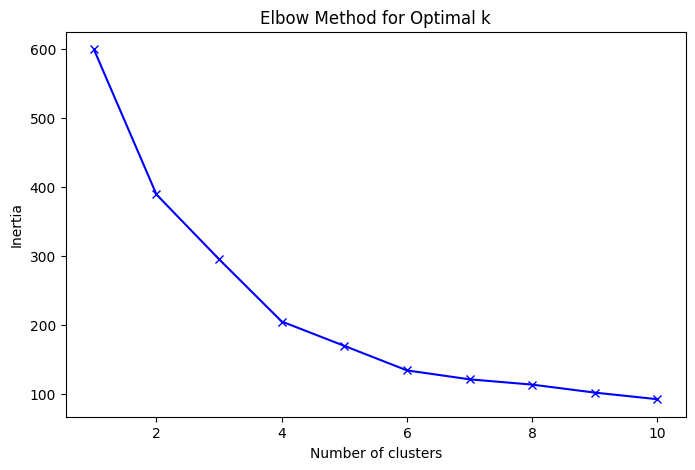

In [28]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [25]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
clusters=kmeans.fit_predict(scaled_features)

In [26]:
df["cluster"]=clusters

In [30]:
silhouette_avg = silhouette_score(scaled_features, clusters)

In [31]:
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3579234303882264
